In [43]:
import os
import sqlite3
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
import seaborn as sns
from tqdm import tqdm_notebook
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

def f_requete_sql (requete) :
    try:
        connexion = sqlite3.connect('./data/liste_piezos.db')
        curseur = connexion.cursor()
        print("Connexion réussie à SQLite")
        curseur.execute(requete)
        connexion.commit()
        resultat = curseur.fetchall()
        curseur.close()
        connexion.close()
        print("Connexion SQLite est fermée")
        return resultat
    except sqlite3.Error as error:
        print("Erreur lors du mis à jour dans la table", error)
        
def f_plot_nan (dataframe):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    sns.heatmap(dataframe.T.isna(), cmap='Blues', cbar=False)
    ax.set_title('Missing Values', fontsize=16)
    # Masquage des noms de piezo 
    ax.yaxis.set_visible(False)
    # Formatage de la date pour l'affichage
    ax.xaxis.set_ticklabels([pd.to_datetime(value).strftime('%Y') for value in ax.xaxis.get_major_formatter().func.args[0].values()])
    plt.show()

# Création table des caractéristiques des piezos

In [79]:
requete = """
        SELECT code_bss, altitude_station, profondeur_investigation, codes_bdlisa, cluster_kmeans, FRANCE_lvl_1, FRANCE_lvl_2, FRANCE_lvl_3, FRANCE_lvl_4, EtatEH, NatureEH, MilieuEH, ThemeEH, OrigineEH
        FROM data_piezo
        INNER JOIN TME
        ON codes_bdlisa = CodeEH
        WHERE cluster_kmeans IS NOT NULL
        """

data = pd.DataFrame(f_requete_sql(requete))
data.columns = ["code_bss", "altitude_station", "profondeur_investigation", "codes_bdlisa", "cluster_kmeans", "FRANCE_lvl_1", "FRANCE_lvl_2", "FRANCE_lvl_3", "FRANCE_lvl_4", "EtatEH", "NatureEH", "MilieuEH", "ThemeEH", "OrigineEH"]
data.head()

Connexion réussie à SQLite
Connexion SQLite est fermée


,code_bss,altitude_station,profondeur_investigation,codes_bdlisa,cluster_kmeans,FRANCE_lvl_1,FRANCE_lvl_2,FRANCE_lvl_3,FRANCE_lvl_4,EtatEH,NatureEH,MilieuEH,ThemeEH,OrigineEH
0,03423X0056_100,174.0,10.7,221AA15,GES_C,3,31,312,3121,2,5,1,1,1
1,06216X0228_P30-10,237.2,8.0,932AR01,ARA_A,3,31,312,3122,2,5,1,1,1
2,09145X0057_N210,31.0,14.5,712IA01,PAC_A,3,31,313,3131,2,5,1,1,1
3,06932X0178_P10,801.8,48.0,153AA01,ARA_A,3,31,312,3122,2,5,4,5,1
4,06505X0093_PZ10,175.0,19.0,507AD00,ARA_A,3,31,312,3122,2,7,1,2,3


In [150]:
# Données X et y

In [157]:
X = data.loc[:,["EtatEH", "NatureEH", "MilieuEH", "ThemeEH", "OrigineEH"]]
y = data["cluster_kmeans"].values.reshape(-1,1)

In [158]:
# Split test et train

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [160]:
# Encodage

In [162]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)

In [163]:
#Estimateur

In [164]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_encoded, y_train)

C:\Users\daranlot\Anaconda3\envs\Environnement\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [166]:
model.predict(X_train_encoded)

array(['NAQ_F', 'HDF_D', 'ARA_A', 'OCC_D', 'CVL_B', 'GES_C', 'CVL_B',
       'ARA_A', 'OCC_B', 'ARA_B', 'GES_C', 'NAQ_A', 'HDF_D', 'PDL_A',
       'NOR_A', 'CVL_B', 'HDF_C', 'GES_C', 'OCC_B', 'GES_C', 'NAQ_D',
       'NAQ_F', 'NAQ_A', 'CVL_B', 'NAQ_C', 'NAQ_A', 'BRE_A', 'NAQ_A',
       'CVL_B', 'ARA_B', 'HDF_D', 'NAQ_F', 'NOR_D', 'CVL_A', 'HDF_A',
       'NAQ_D', 'NOR_D', 'CVL_B', 'NAQ_A', 'GES_C', 'NAQ_A', 'ARA_B',
       'GES_C', 'NAQ_A', 'NAQ_C', 'GES_C', 'NAQ_F', 'NAQ_D', 'NAQ_F',
       'NOR_A', 'NOR_D', 'GES_C', 'GES_C', 'GES_C', 'NOR_A', 'HDF_D',
       'GES_C', 'HDF_D', 'GES_C', 'BRE_A', 'NAQ_F', 'NAQ_A', 'GES_C',
       'CVL_B', 'NAQ_A', 'CVL_A', 'NAQ_A', 'ARA_B', 'CVL_B', 'NAQ_F',
       'NAQ_A', 'CVL_B', 'GES_C', 'GES_C', 'NAQ_D', 'NOR_A', 'NAQ_F',
       'CVL_A', 'ARA_B', 'NAQ_A', 'ARA_A', 'NAQ_F', 'HDF_D', 'ARA_A',
       'HDF_D', 'HDF_D', 'GES_C', 'CVL_B', 'NAQ_D', 'GES_C', 'ARA_B',
       'NOR_A', 'GES_C', 'HDF_D', 'NAQ_C', 'CVL_A', 'NAQ_A', 'GES_C',
       'HDF_D', 'NAQ

## Pipeline

<AxesSubplot:xlabel='NatureEH', ylabel='cluster_kmeans'>

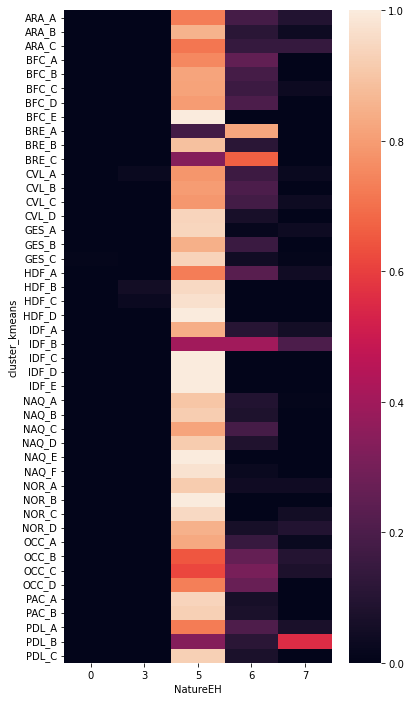

In [110]:
plt.figure(figsize=(6,12))
sns.heatmap(pd.crosstab(data.cluster_kmeans, data.NatureEH, normalize="index"))

# Import de la table des clusters et code_bss

In [44]:
requete = """
        SELECT *
        FROM flagship_piezo_FRANCE
"""
liste = pd.DataFrame(f_requete_sql(requete))
liste.columns = ["cluster", "code_bss"]
liste.set_index("cluster", inplace=True)

Connexion réussie à SQLite
Connexion SQLite est fermée


## Ajout champ level en fonction du nom de cluster

In [56]:
liste["level"] = [len(cluster[1]) for cluster in liste.index.str.split("_")]
liste.head(10)

,code_bss,level
cluster,,
FRANCE_1,00801X0005_S1,1
FRANCE_2,09668X0106_16,1
FRANCE_3,07545X0002_F1,1
FRANCE_11,04851X0091_PZ,2
FRANCE_12,01815X0006_FAEP,2
FRANCE_21,03795X0037_55,2
FRANCE_22,07208X0197_F1C,2
FRANCE_31,07545X0002_F1,2
FRANCE_111,00263X0006_P1,3


In [57]:
level = 2

In [58]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")

liste_piezo = liste.loc[(liste.level == level),"code_bss"].values

chroniques = pd.read_csv(f"./data/piezo/{liste_piezo[0]}.csv", sep = ";", parse_dates=True, date_parser=custom_date_parser, index_col="date_mesure")
chroniques.columns = [liste_piezo[0]]

In [59]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")

liste_piezo = liste.loc[(liste.level == level),"code_bss"].values

chroniques = pd.read_csv(f"./data/piezo/{liste_piezo[0]}.csv", sep = ";", parse_dates=True, date_parser=custom_date_parser, index_col="date_mesure")
chroniques.columns = [liste_piezo[0]]
chroniques = chroniques.resample('7D', origin ="epoch").mean()

for piezo in liste_piezo[1:]:
    df = pd.read_csv(f"./data/piezo/{piezo}.csv", sep=";",  index_col=0, parse_dates=True, date_parser=custom_date_parser)
    df = df.resample('7D', origin ="epoch").mean()
    df.rename(columns={"piezo":f"{piezo}"}, inplace=True)
    chroniques = pd.merge(chroniques,df,left_index=True, right_index=True,how='outer')
chroniques.tail(30)

,04851X0091_PZ,01815X0006_FAEP,03795X0037_55,07208X0197_F1C,07545X0002_F1
date_mesure,,,,,
2021-11-04,-16.588571,-15.022857,-6.99,-13.314286,-1.644286
2021-11-11,-16.597143,-15.072857,-7.07,-13.314286,-1.638571
2021-11-18,-16.600000,-15.188571,-7.11,-13.314286,-1.648571
2021-11-25,-16.605714,-15.132857,-7.19,-13.314286,-1.602857
2021-12-02,-16.607143,-15.184286,-7.25,-13.307143,-1.513333
2021-12-09,-16.607143,-15.150000,-7.32,-13.332857,-1.142857
2021-12-16,-16.610000,-15.075714,-7.35,-13.330000,-1.151429
2021-12-23,-16.598571,-14.952857,-7.39,-13.334286,-1.130000
2021-12-30,-16.570000,-14.861429,-7.36,-13.331429,-1.011429


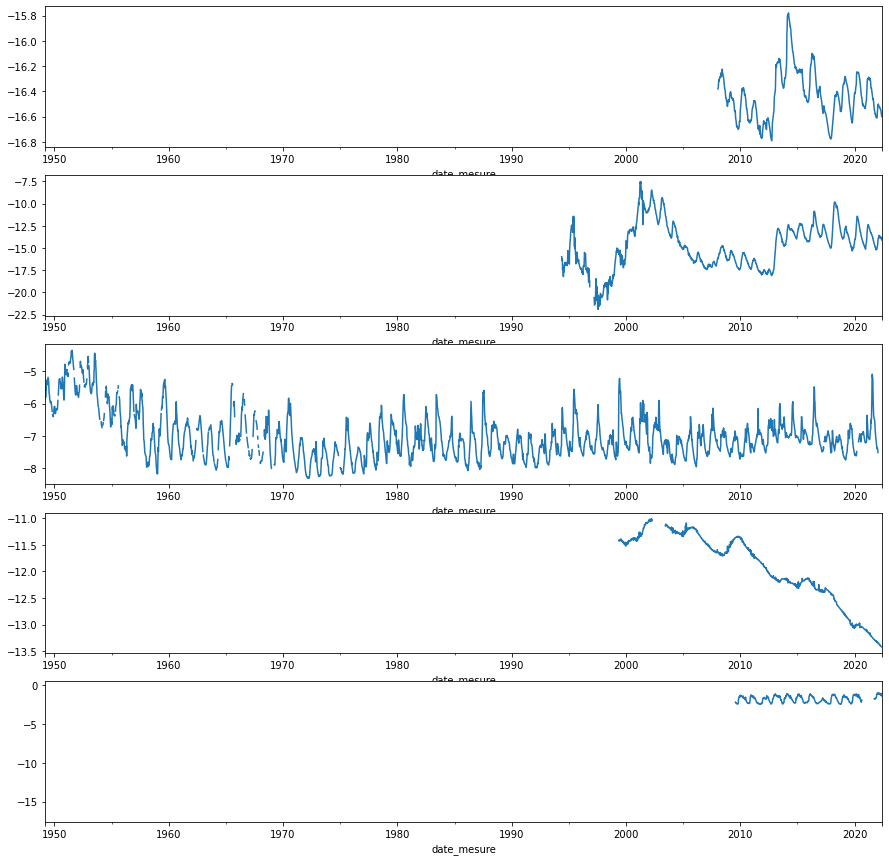

In [60]:
fig, ax = plt.subplots(nrows=len(liste_piezo), ncols=1, figsize=(15,15))
for index, piezo in enumerate (liste_piezo):
    chroniques.loc[:,piezo].plot(ax=ax[index])

In [66]:
first_date = chroniques.apply(lambda col: col.first_valid_index()).max()
last_date = chroniques.apply(lambda col: col.last_valid_index()).min()

In [70]:
chroniques = chroniques.loc[first_date : ]

<AxesSubplot:xlabel='date_mesure'>

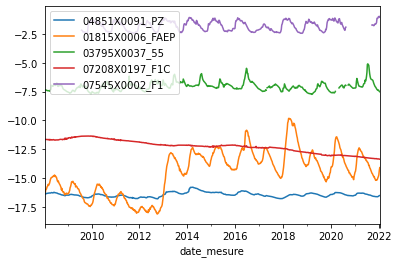

In [71]:
chroniques.plot()

# Nettoyage des chroniques

# Stationnarité

Le test de Dickey-Fuller augmenté peut être utilisé pour tester une racine unitaire dans un processus univarié en présence d'une corrélation sérielle.  

L'hypothèse nulle du Dickey-Fuller augmenté est qu'il existe une racine unitaire, avec l'alternative qu'il n'y a pas de racine unitaire. Si la pvalue est supérieure à une taille critique, nous ne pouvons pas rejeter l'existence d'une racine unitaire.

Les valeurs de p sont obtenues par approximation de surface de régression à partir de MacKinnon 1994, mais en utilisant les tables mises à jour de 2010. Si la valeur de p est proche de la signification, les valeurs critiques doivent être utilisées pour déterminer s'il faut rejeter la valeur nulle.

L'hypothèse nulle est que la série n'est pas stationnaire

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title(f'Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, method='ywm')
        plt.tight_layout()
    
    return p_value

In [ ]:
data

In [ ]:
Analyse_cluster = pd.DataFrame(columns=["adfuller"], index=data.columns, dtype=float)
for cluster in data.columns :
    p_value = tsplot(data[cluster], lags=50)
    Analyse_cluster.loc[cluster, "adfuller"] = p_value

In [ ]:
Analyse_cluster